JUDUL : PENDETEKSI JALANAN BERLUBANG DENGAN METODE EFFICIENTNET

SHERARD VARASYA
A11.2022.14450


# Abstrak 
Tujuan: Penelitian ini bertujuan untuk memprediksi jalanan berlubang agar dapat meminimalisir bahaya yang akan disebabkan olehnya. Dengan demikian, penggunaan teknologi seperti EfficientNet tidak hanya dapat meningkatkan keamanan dan kenyamanan berkendara, tetapi juga mempercepat tanggapan terhadap keadaan darurat. Integrasi EfficientNet dalam sistem pemantauan dan perawatan infrastruktur jalan di Indonesia dapat membantu mengurangi kecelakaan dan kerusakan kendaraan akibat lubang-lubang jalan, serta meningkatkan efisiensi penggunaan sumber daya dalam pemeliharaan jalan.

# Metode/Desain pembelajaran/ Pendekatan: 
Penelitian ini menggunakan metode EfficientNet dalam memprediksi jalanan yang berlubang. Penelitian ini mencangkup proses Pre-Processing ,Define Model, Define Loss Function and Optimizer, Train the Model, Evaluate the Model, Predict Image, dan proses ini dilakukan pada banyaknya data berupa gambar untuk melatih dan memprediksi apakah jalanan tersebut berlubang.

# Hasil/Penemuan: 
Pengoptimalan dengan menggunakan model EffientNet-B0 dalam memprediksi jalan berlubang mencapai hasil akurasi sebesar 93.75%. Hasil ini menunjukan akurasi yang lebih besar dari penelitian yang dilakukan oleh Mahmoud reda yang menggunakan CNN dan mendapat akurasi pada 87.5%. Berdasarkan hasil model EfficientNet-B0 berhasil dalam peningkatan akurasi dan prediksi jalan berlubang.

# Novelti/Keaslian/Nilai:
 Penelitian ini memperkenalkan penggunaan model EfficientNet-B0 dimana Metode ini menawarkan peningkatan akurasi yang signifikan dalam memprediksi jalan berlubang, dan juga menunjukkan efisiensi komputasi yang lebih baik dibandingkan dengan model-model konvolusional lainnya seperti CNN dan GLCM. Dengan demikian, penelitian ini memberikan kontribusi yang penting dalam bidang teknologi pengolahan citra dan aplikasi praktisnya dalam infrastruktur jalan, serta potensi integritasnya dalam sistem pemantauan lalu lintas dan keamanan jalan.

# Kata kunci: 
Prediksi Lubang, EfficientNet, Keselamatan Jalan


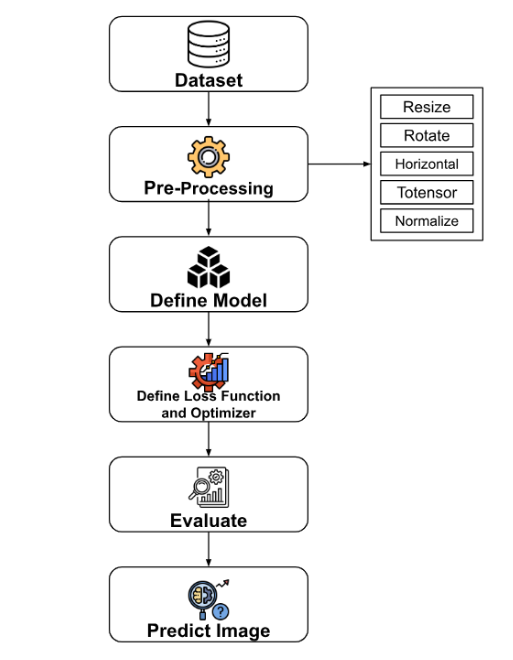

In [2]:
from PIL import Image
from IPython.display import display

image_path = "C:/Users/LENOVO/Pictures/Screenshots/Screenshot 2024-07-25 213626.png"

image = Image.open(image_path)
display(image)


# Penelitian ini bertujuan untuk memprediksi kondisi jalan, apakah dalam keadaan rata (plain) atau berlubang (pothole), dengan menggunakan metode transfer learning dan model EfficientNet-B0. Berdasarkan Gambar 1, alur yang harus dilakukan adalah :

# Pre-Processing
Pada tahap ini dilakukan transformasi terhadap gambar untuk proses pelatihan dan pengujian, agar mendapatkan data yang seragam dan bervariasi, sehingga data memiliki distribusi yang konsisten, dan meningkatkan generalisasi model terhadap variasi data.. Beberapa transformasi yang dilakukan untuk pelatihan adalah resize (150 x 150), random rotation (5 derajat), random horizontal, ToTensor, normalize (0.5, 0.5, 0.5). Transformasi yang sama juga dilakukan pada data uji lebih sedikit untuk menjaga konsistensi evaluasi model, yaitu meliputi resize, ToTensor, normalize.

Pada pengolahan warna gambar, terdapat berbagai macam model warna. Salah satu model yang paling sering digunakan adalah model RGB (red, green, blue), yang digunakan dalam perangkat seperti monitor. Dalam model RGB, gambar direpresentasikan menggunakan tiga komponen warna tersebut. Selain model RGB, terdapat juga model HSV yang terdiri dari tiga komponen: hue color, saturation, dan value. Hue mengukur panjang gelombang warna dominan yang dilihat oleh mata, sementara saturation mengukur seberapa banyak cahaya putih yang bercampur dengan hue.

Citra grayscale atau citra beraras keabuan adalah citra yang hanya menggunakan gradasi warna abu-abu. Warna abu-abu dalam ruang RGB adalah satu-satunya warna di mana komponen merah, hijau, dan biru memiliki intensitas yang sama. Citra grayscale berguna untuk menyederhanakan informasi dari citra RGB, yang memiliki tiga komponen warna, menjadi satu komponen saja.

Filter Mean adalah teknik yang meningkatkan nilai piksel dalam gambar dengan menggunakan nilai rata-rata dari intensitas piksel di sekitarnya. Teknik ini sederhana, intuitif, dan mudah diterapkan untuk meningkatkan gambar dengan mengurangi variasi intensitas piksel. Filter Mean adalah filter linier yang menggantikan intensitas piksel dengan rata-rata intensitas dari piksel-piksel tetangganya.

Median filter adalah salah satu jenis filter order statistic yang menggantikan nilai sebuah piksel dengan nilai median dari intensitas keabuan piksel-piksel di sekitarnya. Filter median adalah filter non-linier yang sangat efisien untuk menghilangkan noise impuls. Metode ini menggantikan piksel di pusat jendela median dengan nilai median dari piksel-piksel di jendela tersebut [12]. Pada penelitian ini, filter balance merupakan kombinasi antara filter mean dan filter median dengan tingkat keseimbangan tertentu.

# Define Model
Model yang digunakan adalah EfficientNet. Dasar dari model EfficientNet [13] adalah metode scaling komposit sederhana dan sangatlah efektif, yang memungkinkan dalam peningkatan skala ConvNet dasar agar sesuai dengan batasan sumber daya yang ditargetkan yang dalam prosesnya tetap mempertahankan efisiensi dari model. Model EfficientNet memiliki model dari B0 sampai B7, yang masing-masing jumlah parameternya berbeda [13]. [14] Keberhasilan EfficientNet berasal dari penskalaan seragam dalam tiga dimensi: kedalaman, lebar, dan resolusi, menggunakan fungsi aktivasi Swish dan blok MBConv terbalik. Pada penelitian ini digunakan EfficientNet-B0, dikarenakan lebih ringan dibanding model di atasnya, dan karena ringan biasanya dapat memberi keseimbangan antara akurasi dan efisiensi komputasi. Bagian akhir dari model ini, yaitu lapisan fully connected (FC), diganti dengan lapisan baru yang memiliki dua output sesuai dengan jumlah kelas dalam dataset. Proses ini melibatkan pengambilan jumlah fitur input dari lapisan FC asli dan menggantinya dengan lapisan linear yang sesuai dengan jumlah kelas target (plain dan pothole).

# Define Loss Function and Optimizer
Model diinisialisasi dan dipindahkan ke perangkat GPU, untuk mempercepat proses komputasi. Optimizer Adam digunakan untuk memperbarui bobot model selama pelatihan, dan fungsi loss yang digunakan adalah cross-entropy, yang sesuai untuk tugas klasifikasi.

# Train the Model
Pelatihan model dilakukan dalam loop selama 20 epoch, di mana dalam setiap epoch, model melalui siklus penuh dari forward pass dan backward pass untuk setiap batch gambar. Pada forward pass, setiap batch gambar dimasukkan ke dalam model untuk menghasilkan prediksi, yang kemudian dibandingkan dengan label sebenarnya untuk menghitung loss. Selanjutnya, backward pass dilakukan dengan menghitung gradien dari loss pada setiap bobot dalam jaringan menggunakan algoritma backpropagation. Gradien ini kemudian digunakan oleh optimizer untuk memperbarui bobot model untuk meminimalisir loss. Setelah setiap epoch selesai, kinerja model dilakukan evaluasi dengan menghitung loss dan akurasi, yang kemudian dicatat untuk memantau perkembangan model. Proses ini diulang selama 20 kali, dengan setiap epoch memberikan kesempatan bagi model untuk memperbaiki kinerjanya. Monitoring loss dan akurasi secara berkala membantu dalam mengidentifikasi dan mengatasi masalah seperti overfitting, serta memungkinkan penyesuaian hyperparameter seperti learning rate atau ukuran batch untuk mengoptimalkan hasil pelatihan[15].

# Evaluate the Model
Setelah pelatihan, model dievaluasi pada dataset pengujian. Dalam mode evaluasi, model tidak memperbarui parameter, dan loss serta akurasi dihitung berdasarkan output model untuk dataset pengujian. Ini memberikan gambaran tentang kinerja model pada data yang belum pernah dilihat selama pelatihan.

# Predict Image
Fungsi prediksi digunakan untuk menguji model pada gambar. Gambar input diterapkan transformasi yang sama seperti pada data pengujian, dan model menghasilkan prediksi kelas. Fungsi ini juga menampilkan gambar dengan anotasi kelas prediksi untuk mempermudah interpretasi hasil. Fungsi prediksi diuji dengan beberapa gambar dari dataset pengujian untuk memastikan kehandalan model dalam tugas klasifikasi.


# HASIL
Setelah dilakukan analisis menggunakan model EfficientNet, pengembangan model telah menghasilkan tingkat akurasi yang sangat tinggi, yaitu sebesar 93.75%. Hasil ini menunjukkan akurasi yang lebih besar dari penelitian sebelumnya yang menggunakan model CNN dan menghasilkan tingkat akurasi pada 87.5%. Berdasar hasil tersebut, kemampuan model dalam memprediksi sangatlah baik, dikarenakan kesalahan yang telah sangat diminimalisir dalam pengklasifikasian kategori data. Akurasinya yang melebihi 90% ini menunjukkan bahwa model memiliki kinerja yang baik dalam berbagai aplikasi praktis yang mana keakuratan dalam memprediksi sangatlah penting. Tingkat akurasi yang sangat tinggi telah menunjukkan bahwa tingkat pemahaman data yang dimiliki model sangat baik karena kemampuannya dalam memprediksi dengan tepat, yang membuat model sangatlah berguna dalam proses pengambilan keputusan berbasis gambar.

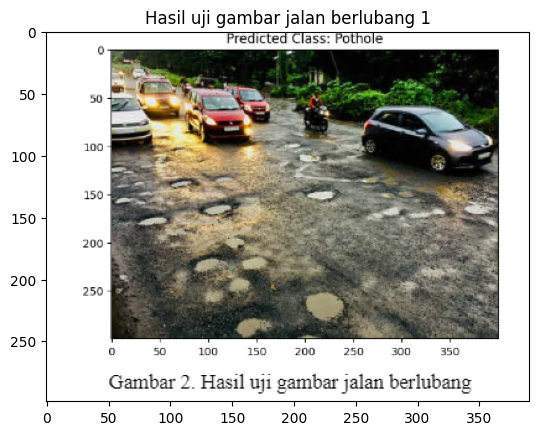

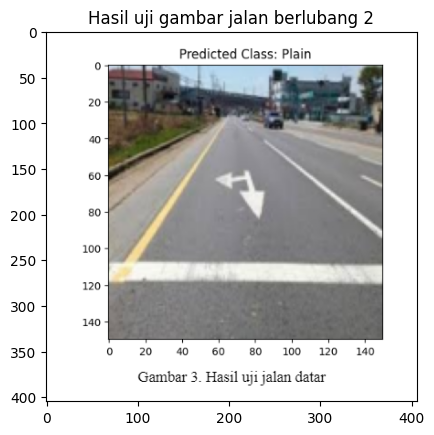

In [3]:
from matplotlib import pyplot as plt
import matplotlib.image as mpimg

# Load and display the first image
img1 = mpimg.imread('C:/Users/LENOVO/Pictures/Screenshots/Screenshot 2024-07-25 215931.png')
plt.imshow(img1)
plt.title('Hasil uji gambar jalan berlubang 1')
plt.show()

# Load and display the second image
img2 = mpimg.imread('C:/Users/LENOVO/Pictures/Screenshots/Screenshot 2024-07-25 220009.png')
plt.imshow(img2)
plt.title('Hasil uji gambar jalan berlubang 2')
plt.show()


Gambar di atas merupakan contoh hasil dari prediksi dua gambar uji, yang memperlihatkan hasil prediksinya menghasilkan pothole (berlubang), dan itu sesuai dengan visualisasi gambar yang ditunjukkan di mana jalanan memiliki banyak lubang, dan hal ini juga menunjukkan bahwa model telah berhasil dalam memprediksi jalan yang berlubang.

# Impor Libraries dan Menentukan Transformasi

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from torchvision import transforms, datasets
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
from PIL import Image
import matplotlib.pyplot as plt
!pip install efficientnet_pytorch
from efficientnet_pytorch import EfficientNet

# Tentukan Direktori dan Transformasi Data

In [ ]:
# Define dataset directories
train_dir = "/content/drive/MyDrive/archive/My Dataset/train"
test_dir = "/content/drive/MyDrive/archive/My Dataset/test"

# Define transformations
train_transform = transforms.Compose([
    transforms.Resize((150, 150)),
    transforms.RandomRotation(5),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
])
test_transform = transforms.Compose([
    transforms.Resize((150, 150)),
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
])

# Load Data

In [ ]:
# Load datasets
train_img = datasets.ImageFolder(train_dir, transform=train_transform)
test_img = datasets.ImageFolder(test_dir, transform=test_transform)
trainloaders = DataLoader(train_img, batch_size=64, shuffle=True)
testloaders = DataLoader(test_img, batch_size=32, shuffle=True)

# Mendefinisikan Model

In [ ]:
# Define the model class
class EfficientNetTransferLearning(nn.Module):
    def __init__(self, num_classes=5):
        super(EfficientNetTransferLearning, self).__init__()
        self.efficientnet = EfficientNet.from_pretrained('efficientnet-b0')
        in_features = self.efficientnet._fc.in_features
        self.efficientnet._fc = nn.Linear(in_features, num_classes)

    def forward(self, x):
        return self.efficientnet(x)

# Initialize the model
model = EfficientNetTransferLearning(num_classes=5)

Loaded pretrained weights for efficientnet-b0


# Mendefinisikan Loss Function and Optimizer

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())
epoch = 20

# Melatih Model

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Training loop
for i in range(epoch):
    model.train()
    total_loss = 0
    total_sample = 0
    total_correct = 0

    for image, label in trainloaders:
        image = image.to(device)
        label = label.to(device)

        optimizer.zero_grad()
        out = model(image)
        loss = criterion(out, label)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        total_sample += len(label)
        total_correct += torch.sum(torch.max(out, 1)[1] == label).item() * 1.0

    print(f"epoch {i+1}, loss: {total_loss/total_sample:.4f}, accuracy: {total_correct/total_sample:.4f}")

epoch 1, loss: 0.0084, accuracy: 0.8762
epoch 2, loss: 0.0004, accuracy: 0.9934
epoch 3, loss: 0.0002, accuracy: 0.9987
epoch 4, loss: 0.0003, accuracy: 0.9934
epoch 5, loss: 0.0009, accuracy: 0.9881
epoch 6, loss: 0.0004, accuracy: 0.9895
epoch 7, loss: 0.0003, accuracy: 0.9960
epoch 8, loss: 0.0001, accuracy: 0.9987
epoch 9, loss: 0.0000, accuracy: 1.0000
epoch 10, loss: 0.0001, accuracy: 0.9974
epoch 11, loss: 0.0000, accuracy: 1.0000
epoch 12, loss: 0.0002, accuracy: 0.9934
epoch 13, loss: 0.0002, accuracy: 0.9974
epoch 14, loss: 0.0002, accuracy: 0.9947
epoch 15, loss: 0.0003, accuracy: 0.9934
epoch 16, loss: 0.0001, accuracy: 0.9974
epoch 17, loss: 0.0000, accuracy: 1.0000
epoch 18, loss: 0.0000, accuracy: 1.0000
epoch 19, loss: 0.0001, accuracy: 0.9987
epoch 20, loss: 0.0002, accuracy: 0.9934


# Mengevaluasi Model

In [ ]:
# Evaluate the model
model.eval()
total_loss = 0
total_sample = 0
total_correct = 0

for image, label in testloaders:
    image = image.to(device)  # Move images to device
    label = label.to(device)  # Move labels to device

    with torch.no_grad():
        out = model(image)
        loss = criterion(out, label)

    total_loss += loss.item()
    total_sample += len(label)
    total_correct += (torch.max(out, 1)[1] == label).sum().item()

# Calculate and print the test loss and accuracy
print(f"test loss: {total_loss / total_sample:.4f}")
print(f"test accuracy: {total_correct / total_sample:.4f}")

test loss: 0.0469
test accuracy: 0.9375


# Memprediksikan Single Image

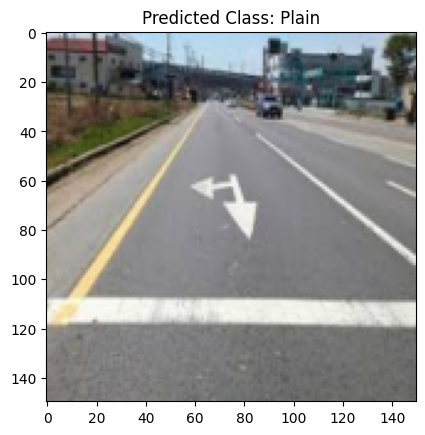

Predicted class: Plain


In [ ]:
# Predict function
def predict_image(image_path, model, transform, class_names):
    image = Image.open(image_path)
    image = transform(image).unsqueeze(0).to(device)
    model.eval()
    with torch.no_grad():
        outputs = model(image)
        _, predicted = torch.max(outputs, 1)
    predicted_class = class_names[predicted.item()]
    plt.imshow(image.cpu().squeeze().permute(1, 2, 0) * 0.5 + 0.5)  # Denormalize for visualization
    plt.title(f'Predicted Class: {predicted_class}')
    plt.show()
    print("Predicted class:", predicted_class)

# Example usage
image_path = "/content/drive/MyDrive/archive/My Dataset/test/Plain/4.jpg"
predict_image(image_path, model, test_transform, train_img.classes)

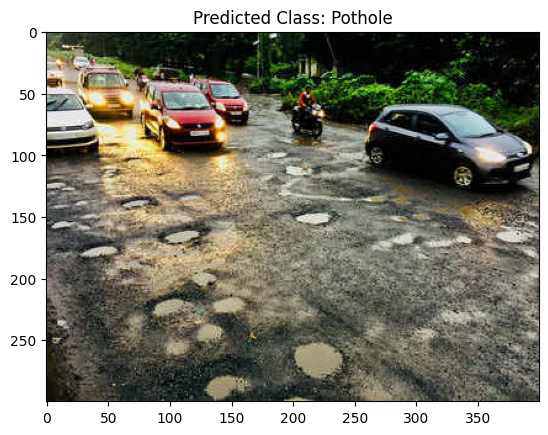

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import torch

# Fungsi untuk melakukan prediksi pada gambar
def predict_image(image_path, model, transform, class_names):
    # Tentukan device (CPU atau CUDA jika tersedia)
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    image = Image.open(image_path)
    transformed_image = transform(image).unsqueeze(0).to(device)

    model.eval()
    with torch.no_grad():
        output = model(transformed_image)
        predicted_index = torch.argmax(output, dim=1).item()

    predicted_class = class_names[predicted_index]

    plt.imshow(image)
    plt.title(f'Predicted Class: {predicted_class}')
    plt.show()

# Contoh penggunaan fungsi predict_image
image_path = "/content/drive/MyDrive/archive/My Dataset/test/Pothole/5.jpg"
predict_image(image_path, model, test_transform, train_img.classes)
